# Research Question: Does the GDP/HDI of a country influence its suicide rate? 

Furthermore, we would like to see if the amount of suicides differs across various age groups. 
Over a ten year period, we will analyze specific countries of differing economic classification: 

Candidates: 
Sweden
US
Japan
Thailand 
Mexico 
Brazil 
Maritius 
Albania 
Kyrgyzstan 
Luxembourg

//Other ideas: 
We want to analyze (over 10 years) the rate of suicide and GDP for that country. 
Can we answer some philosophical question here? (e.g. Is it so, that having basic needs (money-wise or not) is all one needs to sustain life? Does having a lot of money, or having a chance at living well stop people from committing suicide?)


In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("suicide_statistics.csv")
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
data["country"].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [4]:
new_df = data.dropna(subset=['HDI for year'], inplace=True)
print(new_df)

None


We attempt to find a correlation between the HDI of various countries and its suicide rate (over time). 
First, drop unnecessary columns and rows that are not of interest.

In [5]:
df = pd.DataFrame(data)
df = df.drop(['sex', 'age', 'generation'], axis = 1)
df = df.drop(df.columns[7], axis = 1)
df = df.drop(df.columns[7], axis = 1)
df.set_index("country", inplace = True)
df = df.loc[['Sweden', 'United States', 'Japan', 'Thailand', 'Mexico', 'Brazil', 'Maritius', 'Albania', 'Kyrgysztan', 'Luxembourg']]
df = df.dropna(axis = 0, subset = ['HDI for year'])


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [6]:
df_suiciderate = df.drop(['HDI for year'], axis = 1)
df_suiciderate = df.groupby(['country-year']).sum()
df_suiciderate['suicide/100k'] = df_suiciderate['suicides_no'] / df_suiciderate['population'] * 100000
df_suiciderate = df_suiciderate.drop(['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'year'], axis = 1)
df_suiciderate = df_suiciderate.reset_index()
df_suiciderate

,country-year,suicide/100k
0,Albania1995,3.030929
1,Albania2000,1.931123
2,Albania2005,0.000000
3,Albania2010,3.508740
4,Brazil1985,3.598944
5,Brazil1990,3.655597
6,Brazil1995,4.514324
7,Brazil2000,4.288088
8,Brazil2005,5.002817
9,Brazil2010,5.191331


In [7]:
df_hdi = df[['country-year','HDI for year']]
df_hdi = df_hdi.dropna(axis=0, subset = ['HDI for year'])
df_hdi = df_hdi.drop_duplicates()
df_hdi = df_hdi.reset_index()
df_hdi

,country,country-year,HDI for year
0,Sweden,Sweden1990,0.815
1,Sweden,Sweden1995,0.856
2,Sweden,Sweden2000,0.897
3,Sweden,Sweden2005,0.892
4,Sweden,Sweden2010,0.901
5,Sweden,Sweden2011,0.903
6,Sweden,Sweden2012,0.904
7,Sweden,Sweden2013,0.905
8,Sweden,Sweden2014,0.907
9,United States,United States1985,0.841


In [8]:
df_suiciderate

,country-year,suicide/100k
0,Albania1995,3.030929
1,Albania2000,1.931123
2,Albania2005,0.000000
3,Albania2010,3.508740
4,Brazil1985,3.598944
5,Brazil1990,3.655597
6,Brazil1995,4.514324
7,Brazil2000,4.288088
8,Brazil2005,5.002817
9,Brazil2010,5.191331


In [9]:
df_final = pd.merge(df_hdi, df_suiciderate, on = 'country-year')

df_final

,country,country-year,HDI for year,suicide/100k
0,Sweden,Sweden1990,0.815,18.374408
1,Sweden,Sweden1995,0.856,16.373133
2,Sweden,Sweden2000,0.897,13.449862
3,Sweden,Sweden2005,0.892,14.276305
4,Sweden,Sweden2010,0.901,12.931926
5,Sweden,Sweden2011,0.903,12.515977
6,Sweden,Sweden2012,0.904,12.895427
7,Sweden,Sweden2013,0.905,13.630197
8,Sweden,Sweden2014,0.907,12.595282
9,United States,United States1985,0.841,13.340703


In [10]:
df_final['year'] = df_final['country-year'].str.extract('(\d+)').astype(int)
df_final = df_final.drop(['country-year'], axis =1)
df_final = df_final.set_index('country')
df_final

,HDI for year,suicide/100k,year
country,,,
Sweden,0.815,18.374408,1990
Sweden,0.856,16.373133,1995
Sweden,0.897,13.449862,2000
Sweden,0.892,14.276305,2005
Sweden,0.901,12.931926,2010
Sweden,0.903,12.515977,2011
Sweden,0.904,12.895427,2012
Sweden,0.905,13.630197,2013
Sweden,0.907,12.595282,2014


Text(0, 0.5, 'HDI for year')

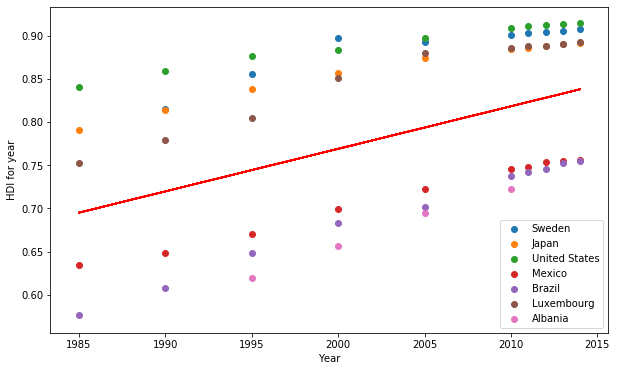

In [11]:
plt.figure(figsize=(10,6))
se = plt.scatter(df_final.loc['Sweden']['year'], df_final.loc['Sweden']['HDI for year'],alpha=1)
jp = plt.scatter(df_final.loc['Japan']['year'],df_final.loc['Japan']['HDI for year'])
us = plt.scatter(df_final.loc['United States']['year'],df_final.loc['United States']['HDI for year'])
mx = plt.scatter(df_final.loc['Mexico']['year'],df_final.loc['Mexico']['HDI for year'])
br = plt.scatter(df_final.loc['Brazil']['year'],df_final.loc['Brazil']['HDI for year'])
lx = plt.scatter(df_final.loc['Luxembourg']['year'], df_final.loc['Luxembourg']['HDI for year'])
ab = plt.scatter(df_final.loc['Albania']['year'], df_final.loc['Albania']['HDI for year'])

fit1 = np.polyfit(df_final['year'], df_final['HDI for year'],1)
plt.plot(df_final['year'],fit1[0]*df_final['year']+fit1[1],color='red')

plt.legend((se, jp,us, mx, br, lx, ab),("Sweden","Japan","United States", "Mexico", "Brazil",
                                      "Luxembourg", "Albania"))
plt.xlabel("Year")
plt.ylabel('HDI for year')

Text(0, 0.5, 'Suicide Rate/100k')

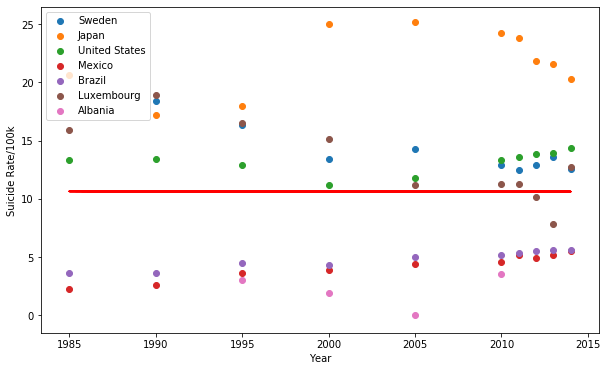

In [12]:
plt.figure(figsize=(10,6))
se = plt.scatter(df_final.loc['Sweden']['year'], df_final.loc['Sweden']['suicide/100k'],alpha=1)
jp = plt.scatter(df_final.loc['Japan']['year'],df_final.loc['Japan']['suicide/100k'])
us = plt.scatter(df_final.loc['United States']['year'],df_final.loc['United States']['suicide/100k'])
mx = plt.scatter(df_final.loc['Mexico']['year'],df_final.loc['Mexico']['suicide/100k'])
br = plt.scatter(df_final.loc['Brazil']['year'],df_final.loc['Brazil']['suicide/100k'])
lx = plt.scatter(df_final.loc['Luxembourg']['year'], df_final.loc['Luxembourg']['suicide/100k'])
ab = plt.scatter(df_final.loc['Albania']['year'], df_final.loc['Albania']['suicide/100k'])

fit1 = np.polyfit(df_final['year'], df_final['suicide/100k'],1)
plt.plot(df_final['year'],fit1[0]*df_final['year']+fit1[1],color='red')

plt.legend((se, jp,us, mx, br, lx, ab),("Sweden","Japan","United States", "Mexico", "Brazil",
                                      "Luxembourg", "Albania"))
plt.xlabel("Year")
plt.ylabel('Suicide Rate/100k')

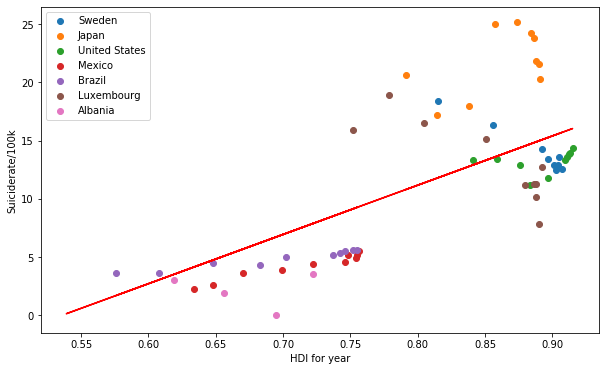

In [13]:
plt.figure(figsize=(10,6))
se = plt.scatter(df_final.loc['Sweden']['HDI for year'], df_final.loc['Sweden']['suicide/100k'],alpha=1)
jp = plt.scatter(df_final.loc['Japan']['HDI for year'],df_final.loc['Japan']['suicide/100k'])
us = plt.scatter(df_final.loc['United States']['HDI for year'],df_final.loc['United States']['suicide/100k'])
mx = plt.scatter(df_final.loc['Mexico']['HDI for year'],df_final.loc['Mexico']['suicide/100k'])
br = plt.scatter(df_final.loc['Brazil']['HDI for year'],df_final.loc['Brazil']['suicide/100k'])
lx = plt.scatter(df_final.loc['Luxembourg']['HDI for year'], df_final.loc['Luxembourg']['suicide/100k'])
ab = plt.scatter(df_final.loc['Albania']['HDI for year'], df_final.loc['Albania']['suicide/100k'])

fit1 = np.polyfit(df_final['HDI for year'], df_final['suicide/100k'],1)
plt.plot(df_final['HDI for year'],fit1[0]*df_final['HDI for year']+fit1[1],color='red')

plt.legend((se, jp,us, mx, br, lx, ab),("Sweden","Japan","United States", "Mexico", "Brazil",
                                      "Luxembourg", "Albania"))
plt.xlabel('HDI for year');
plt.ylabel('Suiciderate/100k');

In [14]:
corr = df_final.corr()
corr

,HDI for year,suicide/100k,year
HDI for year,1.000000,0.698449,0.452208
suicide/100k,0.698449,1.000000,-0.001438
year,0.452208,-0.001438,1.000000
